正确率: 0.88


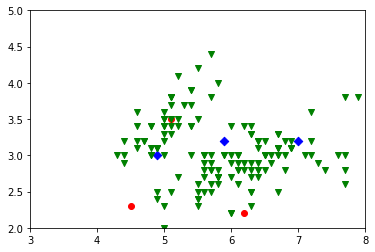

In [64]:
import numpy as np
from sklearn.datasets import load_iris
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
iris = load_iris()

# 距离矩阵W 
def Distence_matrix(L):
    W = np.zeros((len(L),len(L)))
    for i in range(len(L)):
        for j in range(i,len(L)):
            W[i][j] = np.sqrt(np.sum((L[i]-L[j])**2))
            W[j][i] = W[i][j]
    return W
#邻接矩阵
def linjie_matrix(W,k,sigma):
    N=len(W)
    A=np.zeros((N,N))
    for i in range(N):
        dist_with_index = zip(W[i], range(N))
        dist_with_index = sorted(dist_with_index, key=lambda x:x[0])
        neighbours_id = [dist_with_index[m][1] for m in range(k+1)]
        for j in neighbours_id:
            A[j][i] = A[i][j] = np.exp(-W[i][j]/2/sigma/sigma)#高斯核函数
            #print(A[i][j])
    return A

#拉普拉斯矩阵
def laplacian_matrix(A):
    n1 = np.sum(A,axis=1)
    L = np.diag(n1)-A
    n2=n1**(0.5)
    n3=np.diag(1.0/ n2)
    return np.dot(np.dot(n3,L),n3)#f-1/2 * L * f-1/2

if __name__ == '__main__':
    W = Distence_matrix(iris.data)# 距离矩阵W 
    A = linjie_matrix(W,6,0.187)#邻接矩阵
    L=laplacian_matrix(A)#计算喇布拉斯的特征向量和值并且使用k聚类
    
    # KMeans 处理
    lam, H = np.linalg.eig(L)
    lam=np.array(lam,dtype=np.float64)
    H=np.array(H,dtype=np.float64)
    lam = zip(lam,range(150))#压缩
    lam = sorted(lam,key=lambda lam:lam[0])#排序
    H = np.vstack([H[:,i] for v,i in lam[:18]]).T#
    
    model = KMeans(n_clusters=3,n_init=13,random_state=10)
    model.fit(H)
    result=model.labels_
    
    #正确率
    q=np.array([0,0,0])
    for i in result[:50]:
        if i==0:
            q[0]+=1
    for i in result[50:100]:
        if i==1:
            q[1]+=1
    for i in result[100:]:
        if i==2:
            q[2]+=1
    print('正确率:',np.sum(q)/150)
    
    #画出聚类结果，每一类用一种颜色
    X = iris.data
    y = iris.target 
    colors = ['b','g','r']
    n_clusters = 3
    for i in range(n_clusters):
        index = np.nonzero(result==i)[0]
        x0 = X[index,0]
        x1 = X[index,1]
        y_i = y[index]
        for j in range(len(x0)):
            if j==0:
                plt.scatter(x0[j], x1[j], c='r', marker='o')
            elif j==1:
                plt.scatter(x0[j], x1[j], c='b', marker='D')
            else:
                plt.scatter(x0[j], x1[j], c='g', marker='v')
    plt.axis([3,8,2,5])
    plt.show()

    

In [ ]:
准确率88%的原因：
鸢尾花数据集进行kmeans处理时难以处理噪声点

缺点：
未画出无向图
画的散点图中许多点重复，难以观察